## 1 Data Preprocessing

In [3]:
# For data manipulation
import numpy as np
import pandas as pd
import json
import sqlite3
from datetime import datetime

In [4]:
def read_from_db(target_symbol, target_timeframe):
    # Connect to the SQLite database
    conn = sqlite3.connect(f"backtest_results/{target_symbol}_{target_timeframe}.db")
    
    # Read the data into a pandas DataFrame
    query = "SELECT * FROM results"
    df = pd.read_sql_query(query, conn)
    
    # Close the connection
    conn.close()
    
    # Convert the time column to datetime format
    df['time'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S%z'))
    
    # Sort by `task_id`
    df = df.sort_values(by='time').reset_index(drop=True)

    return df


In [5]:
# Fetch analysis results from the database

target_symbol = 'XAUUSD'
target_timeframe = 'M15'
df_analysis = read_from_db(target_symbol, target_timeframe)

# Converted JSON columns to lists
columns_to_convert = ['clustersize', 'clusterdist', 'clusterdata', 'trenddata']
for col in columns_to_convert:
    df_analysis[col] = df_analysis[col].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Verify the conversion
print(df_analysis.info())
df_analysis


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   task_id      3900 non-null   int64  
 1   time         3900 non-null   object 
 2   price        3900 non-null   float64
 3   atr96        3900 non-null   float64
 4   clusternum   3900 non-null   int64  
 5   clustersize  3900 non-null   object 
 6   clusterdist  3900 non-null   object 
 7   clusterdata  3900 non-null   object 
 8   trenddata    3900 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 274.3+ KB
None


,task_id,time,price,atr96,clusternum,clustersize,clusterdist,clusterdata,trenddata
0,3900,2024-09-25 14:00:00+03:00,2655.395,3.346583,3,"[11, 5, 4]","[20.134819318610255, 16.945941551059413, 17.73...","{'cluster_0': [-0.5733311708089883, -0.5611504...","[2653.619059692873, 2653.4327775889096, 2653.2..."
1,3899,2024-09-25 14:15:00+03:00,2655.525,3.339646,2,"[10, 10]","[20.32927667094224, 18.220682349642928]","{'cluster_0': [-0.9652701358043275, -1.2134826...","[2654.006924722007, 2653.8375457175357, 2653.6..."
2,3898,2024-09-25 14:30:00+03:00,2657.165,3.346698,2,"[13, 7]","[17.27953415905463, 23.156132235507407]","{'cluster_0': [-0.41053543889033367, -0.489489...","[2654.6049188799334, 2654.4213731201344, 2654...."
3,3897,2024-09-25 14:45:00+03:00,2657.258,3.343958,2,"[6, 14]","[23.452446646493506, 20.94080968651684]","{'cluster_0': [0.3393324203868158, 1.142004173...","[2654.4576105111882, 2654.2574251364767, 2654...."
4,3896,2024-09-25 15:00:00+03:00,2658.775,3.335031,2,"[8, 12]","[22.359611443499595, 22.92367347562838]","{'cluster_0': [1.000365332654962, 1.7025321593...","[2655.062889070317, 2654.8980227883603, 2654.7..."
...,...,...,...,...,...,...,...,...,...
3895,5,2024-11-22 22:30:00+02:00,2706.885,3.670260,2,"[13, 7]","[20.114949674475838, 20.66993080691289]","{'cluster_0': [-2.295759440117778, -1.77126574...","[2709.0433339865185, 2709.1613337196122, 2709...."
3896,4,2024-11-22 22:45:00+02:00,2705.695,3.661302,2,"[16, 4]","[20.354237068032415, 21.321262172308828]","{'cluster_0': [-2.7436789394909016, -2.9090417...","[2708.5413560729303, 2708.621898394906, 2708.7..."
3897,3,2024-11-22 23:00:00+02:00,2708.665,3.663708,3,"[3, 12, 5]","[20.597846393784533, 17.90099345101313, 18.488...","{'cluster_0': [-0.9575756230084737, -0.5282449...","[2708.2809593051893, 2708.3244069551024, 2708...."
3898,2,2024-11-22 23:15:00+02:00,2709.085,3.661729,2,"[13, 7]","[21.32275504530351, 18.546046581925662]","{'cluster_0': [-0.019354987726623786, 0.867856...","[2708.252749945582, 2708.3122766947863, 2708.3..."


In [6]:
# Fetch historical data from file
df_hist = pd.read_csv("rawdata/XAUUSD_M15_BID_20240902-20241123.csv")

# Convert the 'Local time' column to datetime and set it as index
df_hist['Local time'] = df_hist['Local time'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f GMT%z'))

# Calculate the True Range (TR) and ATR-96
df_hist['TR'] = np.maximum(df_hist['High'] - df_hist['Low'], 
                np.abs(df_hist['High'] - df_hist['Close'].shift(1)),
                np.abs(df_hist['Low'] - df_hist['Close'].shift(1)))
df_hist['ATR'] = df_hist['TR'].rolling(window=96).mean()

df_hist = df_hist.dropna().reset_index(drop=True)
df_hist


,Local time,Open,High,Low,Close,Volume,TR,ATR
0,2024-09-03 04:30:00+03:00,2491.915,2492.504,2489.918,2490.925,1.047510e+06,2.586,2.216583
1,2024-09-03 04:45:00+03:00,2490.985,2494.438,2490.735,2493.635,8.262700e+05,3.703,2.246198
2,2024-09-03 05:00:00+03:00,2493.635,2495.285,2492.365,2495.005,4.507400e+05,2.920,2.266229
3,2024-09-03 05:15:00+03:00,2495.005,2495.375,2493.385,2493.755,2.415000e+05,1.990,2.274490
4,2024-09-03 05:30:00+03:00,2493.815,2496.268,2492.255,2495.225,3.431900e+05,4.013,2.301396
...,...,...,...,...,...,...,...,...
5406,2024-11-22 22:45:00+02:00,2706.925,2706.975,2705.175,2705.695,9.577700e+05,1.800,3.661302
5407,2024-11-22 23:00:00+02:00,2705.695,2709.025,2705.664,2708.665,2.492300e+05,3.361,3.663708
5408,2024-11-22 23:15:00+02:00,2708.705,2709.645,2708.365,2709.085,1.630500e+05,1.280,3.661729
5409,2024-11-22 23:30:00+02:00,2709.075,2711.955,2707.695,2711.865,3.222800e+05,4.260,3.692250


In [7]:
# Create Trading Conditions One-hot Coding within next 8 rows (2 hours)
# e.g. B_2_1 = Buy, 2 ATR TP, 1 ATR SL

def calculate_buy_condition(df, tp_multiplier=2, sl_multiplier=1, lookahead=8):
    # Initialize the new column with False
    cond_name = f'B_{tp_multiplier}_{sl_multiplier}'
    df[cond_name] = False

    for i in range(len(df)):
        # Get the current row values
        current_close = df.at[i, 'Close']
        current_atr = df.at[i, 'ATR']
        upper_threshold = current_close + tp_multiplier * current_atr
        lower_threshold = current_close - sl_multiplier * current_atr

        # Iterate through the next `lookahead` rows
        for j in range(i + 1, min(i + 1 + lookahead, len(df))):
            if df.at[j, 'High'] > upper_threshold:
                # Check if the condition for Low is met before this row
                if (df.loc[i + 1:j, 'Low'] < lower_threshold).any():
                    break  # Low threshold was breached first
                else:
                    df.at[i, cond_name] = True
                    break  # High threshold condition satisfied

    return df

def calculate_sell_condition(df, tp_multiplier=2, sl_multiplier=1, lookahead=8):
    # Initialize the new column with False
    cond_name = f'S_{tp_multiplier}_{sl_multiplier}'
    df[cond_name] = False

    for i in range(len(df)):
        # Get the current row values
        current_close = df.at[i, 'Close']
        current_atr = df.at[i, 'ATR']
        lower_threshold = current_close - tp_multiplier * current_atr
        upper_threshold = current_close + sl_multiplier * current_atr

        # Iterate through the next `lookahead` rows
        for j in range(i + 1, min(i + 1 + lookahead, len(df))):
            if df.at[j, 'Low'] < lower_threshold:
                # Check if the condition for High is met before this row
                if (df.loc[i + 1:j, 'High'] > upper_threshold).any():
                    break  # High threshold was breached first
                else:
                    df.at[i, cond_name] = True
                    break  # Low threshold condition satisfied

    return df

# Apply the function
df_hist = calculate_buy_condition(df_hist, 2, 1)
df_hist = calculate_sell_condition(df_hist, 2, 1)
df_hist

,Local time,Open,High,Low,Close,Volume,TR,ATR,B_2_1,S_2_1
0,2024-09-03 04:30:00+03:00,2491.915,2492.504,2489.918,2490.925,1.047510e+06,2.586,2.216583,True,False
1,2024-09-03 04:45:00+03:00,2490.985,2494.438,2490.735,2493.635,8.262700e+05,3.703,2.246198,False,False
2,2024-09-03 05:00:00+03:00,2493.635,2495.285,2492.365,2495.005,4.507400e+05,2.920,2.266229,False,False
3,2024-09-03 05:15:00+03:00,2495.005,2495.375,2493.385,2493.755,2.415000e+05,1.990,2.274490,False,False
4,2024-09-03 05:30:00+03:00,2493.815,2496.268,2492.255,2495.225,3.431900e+05,4.013,2.301396,False,False
...,...,...,...,...,...,...,...,...,...,...
5406,2024-11-22 22:45:00+02:00,2706.925,2706.975,2705.175,2705.695,9.577700e+05,1.800,3.661302,True,False
5407,2024-11-22 23:00:00+02:00,2705.695,2709.025,2705.664,2708.665,2.492300e+05,3.361,3.663708,True,False
5408,2024-11-22 23:15:00+02:00,2708.705,2709.645,2708.365,2709.085,1.630500e+05,1.280,3.661729,False,False
5409,2024-11-22 23:30:00+02:00,2709.075,2711.955,2707.695,2711.865,3.222800e+05,4.260,3.692250,False,False


In [8]:
df_hist[df_hist['S_2_1']==True]

,Local time,Open,High,Low,Close,Volume,TR,ATR,B_2_1,S_2_1
27,2024-09-03 11:15:00+03:00,2502.665,2504.595,2502.395,2504.555,3.192400e+05,2.200,2.208969,False,True
28,2024-09-03 11:30:00+03:00,2504.495,2506.165,2504.335,2504.925,3.650800e+05,1.830,2.210844,False,True
29,2024-09-03 11:45:00+03:00,2504.925,2505.988,2503.815,2503.835,3.198200e+05,2.173,2.206500,False,True
30,2024-09-03 12:00:00+03:00,2503.865,2504.865,2503.035,2504.335,3.670500e+05,1.830,2.207438,False,True
31,2024-09-03 12:15:00+03:00,2504.308,2504.308,2502.005,2503.388,4.269400e+05,2.303,2.217885,False,True
...,...,...,...,...,...,...,...,...,...,...
5373,2024-11-22 14:30:00+02:00,2698.195,2703.184,2696.925,2703.165,1.132710e+06,6.259,3.641917,False,True
5374,2024-11-22 14:45:00+02:00,2703.125,2704.805,2701.595,2702.835,1.099790e+06,3.210,3.647854,False,True
5375,2024-11-22 15:00:00+02:00,2702.835,2704.005,2696.965,2698.175,1.424810e+06,7.040,3.641917,False,True
5377,2024-11-22 15:30:00+02:00,2691.495,2695.564,2690.285,2691.905,1.749580e+06,5.279,3.728365,False,True


## 2 Handle the Analysis Lists

- trend in 8 bars
- max up in 8 bars for each cluster
- max down in 8 bars for each cluster
- weighted max up for each cluster
- weighted max down for each cluster

In [9]:
# Create the new column 'trend'
df_analysis['trend'] = df_analysis['trenddata'].apply(lambda x: x[-1] - x[0] if len(x) > 1 else 0)

In [10]:
def calculate_cluster_data(row):
    # Initialize the dictionary to hold cluster details
    raw_cluster = {}

    # Iterate over the clusters
    for cluster_idx in range(row['clusternum']):
        cluster_key = f"cluster_{cluster_idx}"
        raw_cluster[cluster_idx] = {
            'size': int(row['clustersize'][cluster_idx]),
            'dist': float(row['clusterdist'][cluster_idx]),
            'data': row['clusterdata'].get(cluster_key, [])  # Get cluster data, default to an empty list
        }

    # Sort the raw_cluster dictionary by size (descending) and then by dist (ascending)
    sorted_raw_cluster = sorted(raw_cluster.items(), key=lambda x: (-x[1]['size'], x[1]['dist']))

    # Re-index the sorted clusters sequentially starting from 0
    new_cluster = {new_idx: cluster_info for new_idx, (original_idx, cluster_info) in enumerate(sorted_raw_cluster)}
    
    calc_result = {}
    for i in range(row['clusternum']):
        calc_result[f'weight_{i}'] = new_cluster[i]['size'] / sum(row['clustersize'])
        data_values = new_cluster[i]['data']
        calc_result[f'upside_{i}'] = max(data_values) - data_values[0]
        calc_result[f'downside_{i}'] = data_values[0] - min(data_values)
    
    return pd.Series(calc_result)

# Update the columns directly if they already exist, otherwise add them
new_columns = df_analysis.apply(calculate_cluster_data, axis=1)
for column in new_columns.columns:
    df_analysis[column] = new_columns[column]

# Create weighted columns
for i in range(3):  # Assuming there are 3 clusters
    df_analysis[f'weighted_upside_{i}'] = df_analysis[f'upside_{i}'] * df_analysis[f'weight_{i}']
    df_analysis[f'weighted_downside_{i}'] = df_analysis[f'downside_{i}'] * df_analysis[f'weight_{i}']


In [11]:
df_analysis

,task_id,time,price,atr96,clusternum,clustersize,clusterdist,clusterdata,trenddata,trend,...,upside_2,weight_0,weight_1,weight_2,weighted_upside_0,weighted_downside_0,weighted_upside_1,weighted_downside_1,weighted_upside_2,weighted_downside_2
0,3900,2024-09-25 14:00:00+03:00,2655.395,3.346583,3,"[11, 5, 4]","[20.134819318610255, 16.945941551059413, 17.73...","{'cluster_0': [-0.5733311708089883, -0.5611504...","[2653.619059692873, 2653.4327775889096, 2653.2...",-1.951986,...,0.000000,0.55,0.25,0.20,0.017123,0.304919,0.520406,0.094785,0.000000,0.528634
1,3899,2024-09-25 14:15:00+03:00,2655.525,3.339646,2,"[10, 10]","[20.32927667094224, 18.220682349642928]","{'cluster_0': [-0.9652701358043275, -1.2134826...","[2654.006924722007, 2653.8375457175357, 2653.6...",-1.815477,...,NaN,0.50,0.50,NaN,1.301427,0.000000,0.317308,0.389480,NaN,NaN
2,3898,2024-09-25 14:30:00+03:00,2657.165,3.346698,2,"[13, 7]","[17.27953415905463, 23.156132235507407]","{'cluster_0': [-0.41053543889033367, -0.489489...","[2654.6049188799334, 2654.4213731201344, 2654....",-2.061988,...,NaN,0.65,0.35,NaN,0.254564,0.233222,0.750841,0.000000,NaN,NaN
3,3897,2024-09-25 14:45:00+03:00,2657.258,3.343958,2,"[6, 14]","[23.452446646493506, 20.94080968651684]","{'cluster_0': [0.3393324203868158, 1.142004173...","[2654.4576105111882, 2654.2574251364767, 2654....",-2.143457,...,NaN,0.70,0.30,NaN,0.004914,0.196104,0.740693,0.000000,NaN,NaN
4,3896,2024-09-25 15:00:00+03:00,2658.775,3.335031,2,"[8, 12]","[22.359611443499595, 22.92367347562838]","{'cluster_0': [1.000365332654962, 1.7025321593...","[2655.062889070317, 2654.8980227883603, 2654.7...",-1.899333,...,NaN,0.60,0.40,NaN,0.000000,1.160150,0.576429,0.261884,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,5,2024-11-22 22:30:00+02:00,2706.885,3.670260,2,"[13, 7]","[20.114949674475838, 20.66993080691289]","{'cluster_0': [-2.295759440117778, -1.77126574...","[2709.0433339865185, 2709.1613337196122, 2709....",1.069371,...,NaN,0.65,0.35,NaN,2.830105,0.000000,0.288096,0.171934,NaN,NaN
3896,4,2024-11-22 22:45:00+02:00,2705.695,3.661302,2,"[16, 4]","[20.354237068032415, 21.321262172308828]","{'cluster_0': [-2.7436789394909016, -2.9090417...","[2708.5413560729303, 2708.621898394906, 2708.7...",0.882517,...,NaN,0.80,0.20,NaN,2.056535,0.132290,1.353821,0.000000,NaN,NaN
3897,3,2024-11-22 23:00:00+02:00,2708.665,3.663708,3,"[3, 12, 5]","[20.597846393784533, 17.90099345101313, 18.488...","{'cluster_0': [-0.9575756230084737, -0.5282449...","[2708.2809593051893, 2708.3244069551024, 2708....",0.649565,...,2.041877,0.60,0.25,0.15,0.954921,0.111496,1.330401,0.000000,0.306282,0.000000
3898,2,2024-11-22 23:15:00+02:00,2709.085,3.661729,2,"[13, 7]","[21.32275504530351, 18.546046581925662]","{'cluster_0': [-0.019354987726623786, 0.867856...","[2708.252749945582, 2708.3122766947863, 2708.3...",0.946293,...,NaN,0.65,0.35,NaN,1.773817,0.000000,0.084331,0.348913,NaN,NaN


## 3 Prediction without M5 TFO

In [12]:
# Merge only the required columns from df_hist into df_analysis
df_merge_logistic = df_analysis.merge(
    df_hist[['Local time', 'B_2_1', 'S_2_1']], 
    left_on='time', 
    right_on='Local time', 
    how='left'
)

df_merge_logistic.drop(columns=['Local time'], inplace=True)
df_merge_logistic = df_merge_logistic.fillna(0)
df_merge_logistic

,task_id,time,price,atr96,clusternum,clustersize,clusterdist,clusterdata,trenddata,trend,...,weight_1,weight_2,weighted_upside_0,weighted_downside_0,weighted_upside_1,weighted_downside_1,weighted_upside_2,weighted_downside_2,B_2_1,S_2_1
0,3900,2024-09-25 14:00:00+03:00,2655.395,3.346583,3,"[11, 5, 4]","[20.134819318610255, 16.945941551059413, 17.73...","{'cluster_0': [-0.5733311708089883, -0.5611504...","[2653.619059692873, 2653.4327775889096, 2653.2...",-1.951986,...,0.25,0.20,0.017123,0.304919,0.520406,0.094785,0.000000,0.528634,True,False
1,3899,2024-09-25 14:15:00+03:00,2655.525,3.339646,2,"[10, 10]","[20.32927667094224, 18.220682349642928]","{'cluster_0': [-0.9652701358043275, -1.2134826...","[2654.006924722007, 2653.8375457175357, 2653.6...",-1.815477,...,0.50,0.00,1.301427,0.000000,0.317308,0.389480,0.000000,0.000000,True,False
2,3898,2024-09-25 14:30:00+03:00,2657.165,3.346698,2,"[13, 7]","[17.27953415905463, 23.156132235507407]","{'cluster_0': [-0.41053543889033367, -0.489489...","[2654.6049188799334, 2654.4213731201344, 2654....",-2.061988,...,0.35,0.00,0.254564,0.233222,0.750841,0.000000,0.000000,0.000000,True,False
3,3897,2024-09-25 14:45:00+03:00,2657.258,3.343958,2,"[6, 14]","[23.452446646493506, 20.94080968651684]","{'cluster_0': [0.3393324203868158, 1.142004173...","[2654.4576105111882, 2654.2574251364767, 2654....",-2.143457,...,0.30,0.00,0.004914,0.196104,0.740693,0.000000,0.000000,0.000000,True,False
4,3896,2024-09-25 15:00:00+03:00,2658.775,3.335031,2,"[8, 12]","[22.359611443499595, 22.92367347562838]","{'cluster_0': [1.000365332654962, 1.7025321593...","[2655.062889070317, 2654.8980227883603, 2654.7...",-1.899333,...,0.40,0.00,0.000000,1.160150,0.576429,0.261884,0.000000,0.000000,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,5,2024-11-22 22:30:00+02:00,2706.885,3.670260,2,"[13, 7]","[20.114949674475838, 20.66993080691289]","{'cluster_0': [-2.295759440117778, -1.77126574...","[2709.0433339865185, 2709.1613337196122, 2709....",1.069371,...,0.35,0.00,2.830105,0.000000,0.288096,0.171934,0.000000,0.000000,True,False
3896,4,2024-11-22 22:45:00+02:00,2705.695,3.661302,2,"[16, 4]","[20.354237068032415, 21.321262172308828]","{'cluster_0': [-2.7436789394909016, -2.9090417...","[2708.5413560729303, 2708.621898394906, 2708.7...",0.882517,...,0.20,0.00,2.056535,0.132290,1.353821,0.000000,0.000000,0.000000,True,False
3897,3,2024-11-22 23:00:00+02:00,2708.665,3.663708,3,"[3, 12, 5]","[20.597846393784533, 17.90099345101313, 18.488...","{'cluster_0': [-0.9575756230084737, -0.5282449...","[2708.2809593051893, 2708.3244069551024, 2708....",0.649565,...,0.25,0.15,0.954921,0.111496,1.330401,0.000000,0.306282,0.000000,True,False
3898,2,2024-11-22 23:15:00+02:00,2709.085,3.661729,2,"[13, 7]","[21.32275504530351, 18.546046581925662]","{'cluster_0': [-0.019354987726623786, 0.867856...","[2708.252749945582, 2708.3122766947863, 2708.3...",0.946293,...,0.35,0.00,1.773817,0.000000,0.084331,0.348913,0.000000,0.000000,False,False


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define input features and target
X = df_merge_logistic[['atr96', 'trend', 'weighted_upside_0', 'weighted_upside_1', 'weighted_upside_2', 'weighted_downside_0', 'weighted_downside_1', 'weighted_downside_2']]
y = df_merge_logistic['B_2_1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[301 304]
 [ 71 104]]

Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.50      0.62       605
        True       0.25      0.59      0.36       175

    accuracy                           0.52       780
   macro avg       0.53      0.55      0.49       780
weighted avg       0.68      0.52      0.56       780



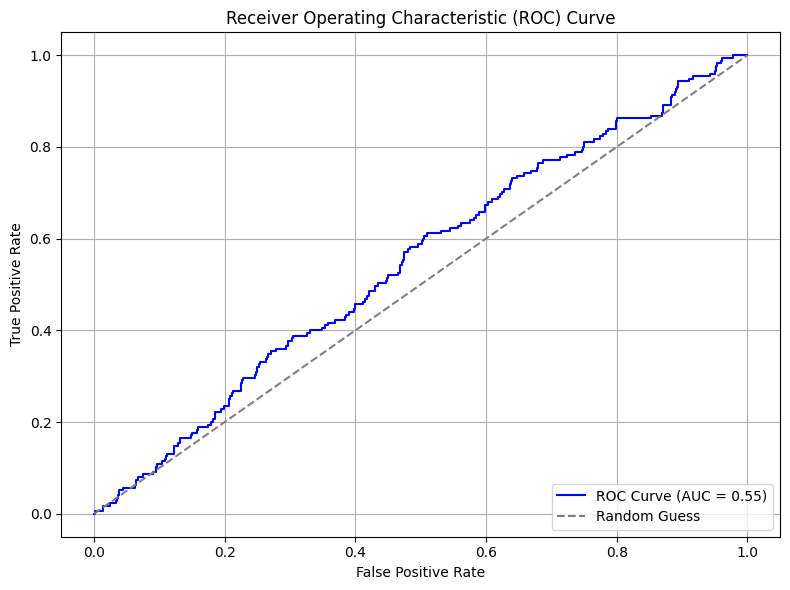

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you already have the model and the test data
# `y_test` is the true labels, and `y_pred_proba` is the predicted probabilities for the positive class

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Guess')

# Add labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


Epoch 1/50


/Users/harrycslau/miniconda3/envs/fxlab/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6583 - loss: 0.6162 - val_accuracy: 0.7933 - val_loss: 0.5165
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7932 - loss: 0.5108 - val_accuracy: 0.7933 - val_loss: 0.5108
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7923 - loss: 0.5093 - val_accuracy: 0.7933 - val_loss: 0.5101
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8090 - loss: 0.4812 - val_accuracy: 0.7933 - val_loss: 0.5121
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7997 - loss: 0.4966 - val_accuracy: 0.7933 - val_loss: 0.5115
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8000 - loss: 0.4920 - val_accuracy: 0.7933 - val_loss: 0.5105
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7797 - loss: 0.5151 - val_accuracy: 0.7933 - val_loss: 0.5128
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7919 - loss: 0.4999 - val_accuracy: 0.7933 - val_loss: 0.5116
Epo

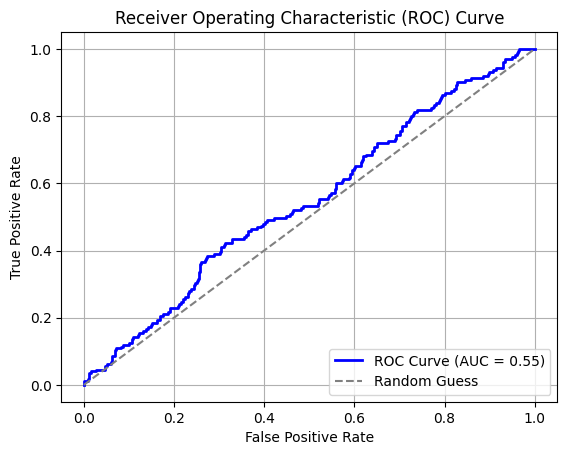

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define input features and target
X = df_merge_logistic[['atr96', 'trend', 'upside_0', 'upside_1', 'upside_2', 'downside_0', 'downside_1', 'downside_2', 'weight_0', 'weight_1', 'weight_2']]
y = df_merge_logistic['B_2_1'].astype(int)  # Ensure target is integer

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_dim=X.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions and metrics
threshold = 0.5
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > threshold).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Class distribution:
0    0.789487
1    0.210513
Name: proportion, dtype: float64

Fold 1/5
Epoch 1/100


/Users/harrycslau/miniconda3/envs/fxlab/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5014 - auc: 0.5149 - loss: 0.9574 - val_accuracy: 0.4880 - val_auc: 0.4956 - val_loss: 0.7417 - learning_rate: 0.0010
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5435 - auc: 0.5493 - loss: 0.8379 - val_accuracy: 0.4280 - val_auc: 0.5190 - val_loss: 0.7798 - learning_rate: 0.0010
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5090 - auc: 0.5209 - loss: 0.8583 - val_accuracy: 0.4060 - val_auc: 0.5067 - val_loss: 0.7904 - learning_rate: 0.0010
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5186 - auc: 0.5362 - loss: 0.8356 - val_accuracy: 0.4860 - val_auc: 0.5180 - val_loss: 0.7547 - learning_rate: 0.0010
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5535 - auc: 0.6020 - loss: 0.7534 - val_accuracy: 0.5360 - val_auc: 0.4921 - val_loss: 0.7520 - learning_rate: 0.0010
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5403 - auc: 0.5741 - loss: 0.771

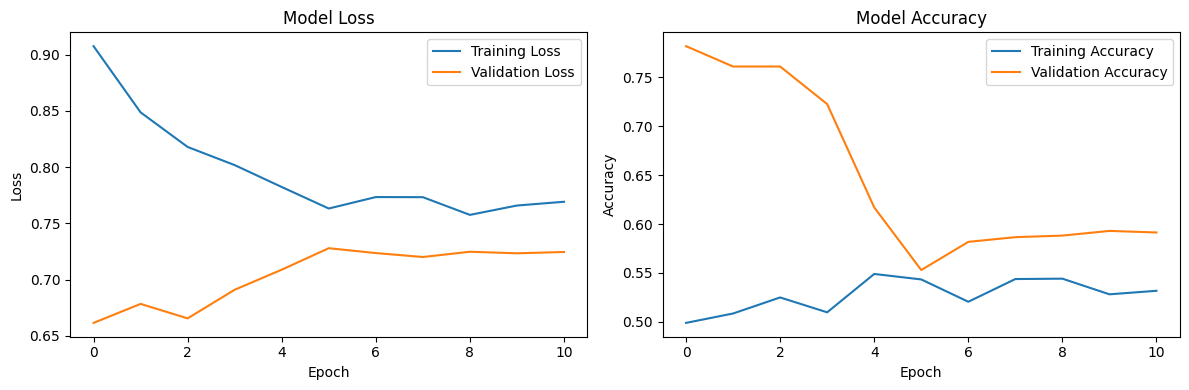

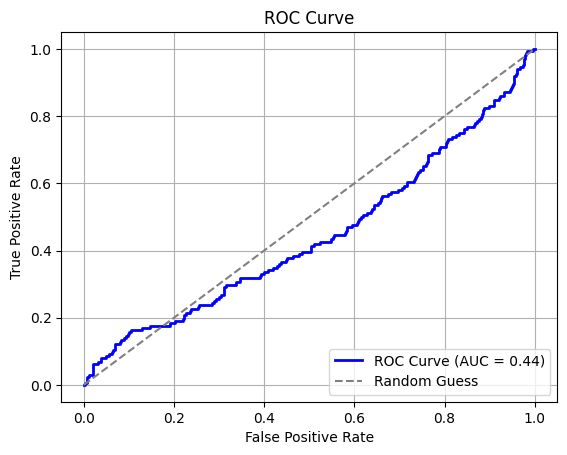

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data preparation
X = df_merge_logistic[['atr96', 'trend', 'upside_0', 'upside_1', 'upside_2', 
                      'downside_0', 'downside_1', 'downside_2', 'weight_0', 'weight_1', 'weight_2']]
y = df_merge_logistic['B_2_1'].astype(int)

# Convert to numpy arrays to avoid indexing issues
X = X.values
y = y.values

# Check class distribution
print("Class distribution:")
print(pd.Series(y).value_counts(normalize=True))

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Calculate class weights
class_weights = dict(zip(
    np.unique(y_train),
    len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train))
))

# Model architecture
def create_model(input_dim, learning_rate=0.001):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim, 
              kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC()]
    )
    
    return model

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Train with cross-validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
cv_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    print(f'\nFold {fold + 1}/{n_splits}')
    
    # Now using numpy array indexing instead of pandas indexing
    X_train_fold = X_train[train_idx]
    y_train_fold = y_train[train_idx]
    X_val_fold = X_train[val_idx]
    y_val_fold = y_train[val_idx]
    
    model = create_model(X.shape[1])
    
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=100,
        batch_size=32,
        class_weight=class_weights,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(scores[1])

print(f'\nCross-validation accuracy: {np.mean(cv_scores):.3f} (+/- {np.std(cv_scores):.3f})')

# Train final model
final_model = create_model(X.shape[1])
history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate final model
y_pred_prob = final_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nTest Set Metrics:")
print(classification_report(y_test, y_pred))

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## 4 Prediction with TFO

In [17]:
# Fetch historical lower TF (e.g. M5) data from file
df_hist_ltf = pd.read_csv("rawdata/XAUUSD_M5_BID_20240902-20241123.csv")

# Convert the 'Local time' column to datetime and set it as index
df_hist_ltf['Local time'] = df_hist_ltf['Local time'].apply(lambda x: datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f GMT%z'))

df_hist_ltf = df_hist_ltf.dropna().reset_index(drop=True)

In [18]:
# TFO Calculation Functions

def essf(series, period):
    """Ehlers' SuperSmoother Filter (ESSF)"""
    SQRT2xPI = np.sqrt(2.0) * np.pi
    alpha = SQRT2xPI / period
    beta = np.exp(-alpha)
    coef2 = -beta ** 2
    coef1 = 2.0 * beta * np.cos(alpha)
    coef0 = 1.0 - coef1 - coef2

    # Calculate sma2
    sma2 = (series + series.shift(1).fillna(series)) * 0.5

    # Initialize ESSF array
    ess = np.full(len(series), np.nan)
    ess[0] = sma2.iloc[0]

    for t in range(1, len(series)):
        sma2_t = sma2.iloc[t]
        ess_t1 = ess[t - 1]
        ess_t2 = ess[t - 2] if t - 2 >= 0 else 0.0

        ess[t] = coef0 * sma2_t + coef1 * ess_t1 + coef2 * ess_t2

    return pd.Series(ess, index=series.index)

def sum_diffs(series, period):
    """Sum of Differences"""
    E = np.zeros(len(series))
    for i in range(1, period + 1):
        shifted_series = series.shift(i).fillna(0)
        E += (series - shifted_series)
    E /= period
    return pd.Series(E, index=series.index)

def ema_recursive(series, period):
    """Exponential Moving Average (EMA) calculated recursively"""
    coef0 = 2.0 / (period + 1.0)
    coef1 = 1.0 - coef0
    EMA = np.full(len(series), np.nan)
    EMA[0] = series.iloc[0]

    for t in range(1, len(series)):
        series_t = series.iloc[t]
        EMA_t1 = EMA[t - 1]
        EMA[t] = coef0 * series_t + coef1 * EMA_t1

    return pd.Series(EMA, index=series.index)

def fRMS(series, period):
    """Fast Root Mean Square (fRMS)"""
    squared_series = series ** 2
    ema_squared = ema_recursive(squared_series, period)
    sqrt_ema = np.sqrt(ema_squared)
    result = np.nan_to_num(series / sqrt_ema, 0)
    return result

def trendflex(series, period_essf, period_tflx, period_frms):
    """Ehlers' TrendFlex Oscillator (TFO)"""
    essf_filtered = essf(series, period_essf)
    sum_diffs_filtered = sum_diffs(essf_filtered, period_tflx)
    tfo = fRMS(sum_diffs_filtered, period_frms)
    return tfo


# Parameters for Calculating TFO
periodTrendFlex = 20
useSuperSmootherOverride = False
periodSuperSmoother = 7.5
postSmooth = 33.0
if not useSuperSmootherOverride:
    periodSuperSmoother = periodTrendFlex * 0.5

# Calculate TFO
df_hist_ltf = df_hist_ltf.copy()
df_hist_ltf['TFO'] = trendflex(df_hist_ltf['Close'], periodSuperSmoother, periodTrendFlex, postSmooth)
df_hist_ltf['TFO_diff'] = df_hist_ltf['TFO'].diff()
df_hist_ltf.reset_index(drop=True, inplace=True)

In [19]:
# Append the ATR from upper TF (M15)

df_hist_copy = df_hist.copy()

# Ensure 'Local time' is datetime without modifying original
df_hist_copy['Local time'] = pd.to_datetime(df_hist_copy['Local time'], utc=True)
df_hist_ltf['Local time'] = pd.to_datetime(df_hist_ltf['Local time'], utc=True)

# Resample df_hist to 5-minute intervals, forward filling the ATR
df_hist_5min = df_hist_copy.set_index('Local time').resample('5min', origin='start').ffill().reset_index()

# Merge ATR values 
df_hist_ltf['ATR'] = df_hist_ltf['Local time'].map(
    df_hist_5min.set_index('Local time')['ATR']
)

# Optionally convert Local time back to original timezone if needed
df_hist_ltf['Local time'] = df_hist_ltf['Local time'].dt.tz_convert('Europe/Helsinki')  # Replace with your timezone


df_hist_ltf

,Local time,Open,High,Low,Close,Volume,TFO,TFO_diff,ATR
0,2024-09-02 01:00:00+03:00,2502.435,2503.045,2501.195,2502.564,111989.9992,1.000000,NaN,NaN
1,2024-09-02 01:05:00+03:00,2502.465,2503.985,2502.364,2503.985,49320.0006,1.328387,0.328387,NaN
2,2024-09-02 01:10:00+03:00,2504.045,2504.545,2503.854,2504.065,43620.0002,1.294829,-0.033558,NaN
3,2024-09-02 01:15:00+03:00,2503.855,2504.284,2503.625,2504.195,25830.0000,1.125375,-0.169455,NaN
4,2024-09-02 01:20:00+03:00,2504.195,2504.295,2503.435,2503.825,24060.0000,0.935410,-0.189965,NaN
...,...,...,...,...,...,...,...,...,...
16513,2024-11-22 23:35:00+02:00,2709.185,2711.355,2708.325,2710.955,132800.0007,1.048265,0.158945,3.692250
16514,2024-11-22 23:40:00+02:00,2710.965,2711.955,2710.615,2711.865,118110.0012,1.294334,0.246069,3.692250
16515,2024-11-22 23:45:00+02:00,2711.885,2712.795,2711.465,2712.745,126930.0021,1.549805,0.255471,3.718396
16516,2024-11-22 23:50:00+02:00,2712.665,2715.185,2712.245,2714.525,100040.0008,1.788921,0.239116,NaN


In [20]:
# Create Trading Conditions One-hot Coding within next 2 hours (24 rows)
# e.g. B_2_1 = Buy, 2 ATR TP, 1 ATR SL

# Apply the function
df_hist_ltf = calculate_buy_condition(df_hist_ltf, 2, 1, lookahead=24)
df_hist_ltf = calculate_sell_condition(df_hist_ltf, 2, 1, lookahead=24)
df_hist_ltf


,Local time,Open,High,Low,Close,Volume,TFO,TFO_diff,ATR,B_2_1,S_2_1
0,2024-09-02 01:00:00+03:00,2502.435,2503.045,2501.195,2502.564,111989.9992,1.000000,NaN,NaN,False,False
1,2024-09-02 01:05:00+03:00,2502.465,2503.985,2502.364,2503.985,49320.0006,1.328387,0.328387,NaN,False,False
2,2024-09-02 01:10:00+03:00,2504.045,2504.545,2503.854,2504.065,43620.0002,1.294829,-0.033558,NaN,False,False
3,2024-09-02 01:15:00+03:00,2503.855,2504.284,2503.625,2504.195,25830.0000,1.125375,-0.169455,NaN,False,False
4,2024-09-02 01:20:00+03:00,2504.195,2504.295,2503.435,2503.825,24060.0000,0.935410,-0.189965,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16513,2024-11-22 23:35:00+02:00,2709.185,2711.355,2708.325,2710.955,132800.0007,1.048265,0.158945,3.692250,False,False
16514,2024-11-22 23:40:00+02:00,2710.965,2711.955,2710.615,2711.865,118110.0012,1.294334,0.246069,3.692250,False,False
16515,2024-11-22 23:45:00+02:00,2711.885,2712.795,2711.465,2712.745,126930.0021,1.549805,0.255471,3.718396,False,False
16516,2024-11-22 23:50:00+02:00,2712.665,2715.185,2712.245,2714.525,100040.0008,1.788921,0.239116,NaN,False,False


In [21]:
# Generate a new time range with 5-minute intervals
df_analysis_copy = df_analysis.copy()
df_analysis_copy['time'] = pd.to_datetime(df_analysis_copy['time'], utc=True)
new_time_range = pd.date_range(start=df_analysis_copy['time'].min(), end=df_analysis_copy['time'].max(), freq='5min')

# Create a new DataFrame with the full time range
df_full_time = pd.DataFrame({'time': new_time_range})

# Merge the new DataFrame with the original one
df_analysis_copy = pd.merge(df_full_time, df_analysis_copy, on='time', how='left')

# Fill missing rows with the previous data
df_analysis_copy = df_analysis_copy.fillna(method='ffill')
df_analysis_copy


/var/folders/t7/qhsh0qws38d4057943350r400000gn/T/ipykernel_54170/540974328.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_analysis_copy = df_analysis_copy.fillna(method='ffill')


,time,task_id,price,atr96,clusternum,clustersize,clusterdist,clusterdata,trenddata,trend,...,upside_2,weight_0,weight_1,weight_2,weighted_upside_0,weighted_downside_0,weighted_upside_1,weighted_downside_1,weighted_upside_2,weighted_downside_2
0,2024-09-25 11:00:00+00:00,3900.0,2655.395,3.346583,3.0,"[11, 5, 4]","[20.134819318610255, 16.945941551059413, 17.73...","{'cluster_0': [-0.5733311708089883, -0.5611504...","[2653.619059692873, 2653.4327775889096, 2653.2...",-1.951986,...,0.000000,0.55,0.25,0.20,0.017123,0.304919,0.520406,0.094785,0.000000,0.528634
1,2024-09-25 11:05:00+00:00,3900.0,2655.395,3.346583,3.0,"[11, 5, 4]","[20.134819318610255, 16.945941551059413, 17.73...","{'cluster_0': [-0.5733311708089883, -0.5611504...","[2653.619059692873, 2653.4327775889096, 2653.2...",-1.951986,...,0.000000,0.55,0.25,0.20,0.017123,0.304919,0.520406,0.094785,0.000000,0.528634
2,2024-09-25 11:10:00+00:00,3900.0,2655.395,3.346583,3.0,"[11, 5, 4]","[20.134819318610255, 16.945941551059413, 17.73...","{'cluster_0': [-0.5733311708089883, -0.5611504...","[2653.619059692873, 2653.4327775889096, 2653.2...",-1.951986,...,0.000000,0.55,0.25,0.20,0.017123,0.304919,0.520406,0.094785,0.000000,0.528634
3,2024-09-25 11:15:00+00:00,3899.0,2655.525,3.339646,2.0,"[10, 10]","[20.32927667094224, 18.220682349642928]","{'cluster_0': [-0.9652701358043275, -1.2134826...","[2654.006924722007, 2653.8375457175357, 2653.6...",-1.815477,...,0.000000,0.50,0.50,0.20,1.301427,0.000000,0.317308,0.389480,0.000000,0.528634
4,2024-09-25 11:20:00+00:00,3899.0,2655.525,3.339646,2.0,"[10, 10]","[20.32927667094224, 18.220682349642928]","{'cluster_0': [-0.9652701358043275, -1.2134826...","[2654.006924722007, 2653.8375457175357, 2653.6...",-1.815477,...,0.000000,0.50,0.50,0.20,1.301427,0.000000,0.317308,0.389480,0.000000,0.528634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16826,2024-11-22 21:10:00+00:00,3.0,2708.665,3.663708,3.0,"[3, 12, 5]","[20.597846393784533, 17.90099345101313, 18.488...","{'cluster_0': [-0.9575756230084737, -0.5282449...","[2708.2809593051893, 2708.3244069551024, 2708....",0.649565,...,2.041877,0.60,0.25,0.15,0.954921,0.111496,1.330401,0.000000,0.306282,0.000000
16827,2024-11-22 21:15:00+00:00,2.0,2709.085,3.661729,2.0,"[13, 7]","[21.32275504530351, 18.546046581925662]","{'cluster_0': [-0.019354987726623786, 0.867856...","[2708.252749945582, 2708.3122766947863, 2708.3...",0.946293,...,2.041877,0.65,0.35,0.15,1.773817,0.000000,0.084331,0.348913,0.306282,0.000000
16828,2024-11-22 21:20:00+00:00,2.0,2709.085,3.661729,2.0,"[13, 7]","[21.32275504530351, 18.546046581925662]","{'cluster_0': [-0.019354987726623786, 0.867856...","[2708.252749945582, 2708.3122766947863, 2708.3...",0.946293,...,2.041877,0.65,0.35,0.15,1.773817,0.000000,0.084331,0.348913,0.306282,0.000000
16829,2024-11-22 21:25:00+00:00,2.0,2709.085,3.661729,2.0,"[13, 7]","[21.32275504530351, 18.546046581925662]","{'cluster_0': [-0.019354987726623786, 0.867856...","[2708.252749945582, 2708.3122766947863, 2708.3...",0.946293,...,2.041877,0.65,0.35,0.15,1.773817,0.000000,0.084331,0.348913,0.306282,0.000000


In [22]:
# Merge only the required columns from df_hist into df_analysis
df_merge_tfo = df_analysis_copy.merge(
    df_hist_ltf[['Local time', 'TFO', 'TFO_diff', 'B_2_1', 'S_2_1']], 
    left_on='time', 
    right_on='Local time', 
    how='left'
)

df_merge_tfo.drop(columns=['Local time'], inplace=True)
df_merge_tfo = df_merge_tfo.fillna(0)
df_merge_tfo

,time,task_id,price,atr96,clusternum,clustersize,clusterdist,clusterdata,trenddata,trend,...,weighted_upside_0,weighted_downside_0,weighted_upside_1,weighted_downside_1,weighted_upside_2,weighted_downside_2,TFO,TFO_diff,B_2_1,S_2_1
0,2024-09-25 11:00:00+00:00,3900.0,2655.395,3.346583,3.0,"[11, 5, 4]","[20.134819318610255, 16.945941551059413, 17.73...","{'cluster_0': [-0.5733311708089883, -0.5611504...","[2653.619059692873, 2653.4327775889096, 2653.2...",-1.951986,...,0.017123,0.304919,0.520406,0.094785,0.000000,0.528634,0.129123,-0.425290,False,False
1,2024-09-25 11:05:00+00:00,3900.0,2655.395,3.346583,3.0,"[11, 5, 4]","[20.134819318610255, 16.945941551059413, 17.73...","{'cluster_0': [-0.5733311708089883, -0.5611504...","[2653.619059692873, 2653.4327775889096, 2653.2...",-1.951986,...,0.017123,0.304919,0.520406,0.094785,0.000000,0.528634,-0.164541,-0.293664,True,False
2,2024-09-25 11:10:00+00:00,3900.0,2655.395,3.346583,3.0,"[11, 5, 4]","[20.134819318610255, 16.945941551059413, 17.73...","{'cluster_0': [-0.5733311708089883, -0.5611504...","[2653.619059692873, 2653.4327775889096, 2653.2...",-1.951986,...,0.017123,0.304919,0.520406,0.094785,0.000000,0.528634,-0.371355,-0.206814,True,False
3,2024-09-25 11:15:00+00:00,3899.0,2655.525,3.339646,2.0,"[10, 10]","[20.32927667094224, 18.220682349642928]","{'cluster_0': [-0.9652701358043275, -1.2134826...","[2654.006924722007, 2653.8375457175357, 2653.6...",-1.815477,...,1.301427,0.000000,0.317308,0.389480,0.000000,0.528634,-0.641736,-0.270380,True,False
4,2024-09-25 11:20:00+00:00,3899.0,2655.525,3.339646,2.0,"[10, 10]","[20.32927667094224, 18.220682349642928]","{'cluster_0': [-0.9652701358043275, -1.2134826...","[2654.006924722007, 2653.8375457175357, 2653.6...",-1.815477,...,1.301427,0.000000,0.317308,0.389480,0.000000,0.528634,-0.721580,-0.079845,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16826,2024-11-22 21:10:00+00:00,3.0,2708.665,3.663708,3.0,"[3, 12, 5]","[20.597846393784533, 17.90099345101313, 18.488...","{'cluster_0': [-0.9575756230084737, -0.5282449...","[2708.2809593051893, 2708.3244069551024, 2708....",0.649565,...,0.954921,0.111496,1.330401,0.000000,0.306282,0.000000,-0.349134,0.291254,True,False
16827,2024-11-22 21:15:00+00:00,2.0,2709.085,3.661729,2.0,"[13, 7]","[21.32275504530351, 18.546046581925662]","{'cluster_0': [-0.019354987726623786, 0.867856...","[2708.252749945582, 2708.3122766947863, 2708.3...",0.946293,...,1.773817,0.000000,0.084331,0.348913,0.306282,0.000000,0.072649,0.421783,False,False
16828,2024-11-22 21:20:00+00:00,2.0,2709.085,3.661729,2.0,"[13, 7]","[21.32275504530351, 18.546046581925662]","{'cluster_0': [-0.019354987726623786, 0.867856...","[2708.252749945582, 2708.3122766947863, 2708.3...",0.946293,...,1.773817,0.000000,0.084331,0.348913,0.306282,0.000000,0.471831,0.399182,False,False
16829,2024-11-22 21:25:00+00:00,2.0,2709.085,3.661729,2.0,"[13, 7]","[21.32275504530351, 18.546046581925662]","{'cluster_0': [-0.019354987726623786, 0.867856...","[2708.252749945582, 2708.3122766947863, 2708.3...",0.946293,...,1.773817,0.000000,0.084331,0.348913,0.306282,0.000000,0.738670,0.266839,False,False


In [23]:
# Output selected columns to CSV for further backtesting
df_merge_csv = df_analysis_copy.merge(
    df_hist_ltf[['Local time', 'Open', 'High', 'Low', 'Close', 'TFO', 'TFO_diff', 'B_2_1', 'S_2_1']], 
    left_on='time', 
    right_on='Local time', 
    how='left'
)
df_merge_csv = df_merge_csv.fillna(0)

df_merge_csv.rename(columns={'time': 'DateTime'}, inplace=True)
df_merge_csv['DateTime'] = df_merge_csv['DateTime'].dt.strftime('%Y-%m-%d %H:%M')

selected_columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'atr96', 'TFO', 'TFO_diff',
                    'upside_0', 'upside_1', 'upside_2', 'downside_0', 'downside_1', 'downside_2',
                    'weight_0', 'weight_1', 'weight_2' ]
df_selected = df_merge_csv[selected_columns]

# Export to CSV
df_selected.to_csv('backtest_results/XAUUSD_M5_btdata.csv', index=False)

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define input features and target
X = df_merge_tfo[['atr96', 'trend', 'weighted_upside_0', 'weighted_upside_1', 'weighted_upside_2', 'weighted_downside_0', 'weighted_downside_1', 'weighted_downside_2', 'TFO', 'TFO_diff']]
y = df_merge_tfo['B_2_1']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the target variable to categorical/binary
threshold = 0.5
y_train = (y_train > threshold).astype(int)
y_test = (y_test > threshold).astype(int)

# Initialize and train the logistic regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1710 1164]
 [ 188  305]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.59      0.72      2874
           1       0.21      0.62      0.31       493

    accuracy                           0.60      3367
   macro avg       0.55      0.61      0.51      3367
weighted avg       0.80      0.60      0.66      3367



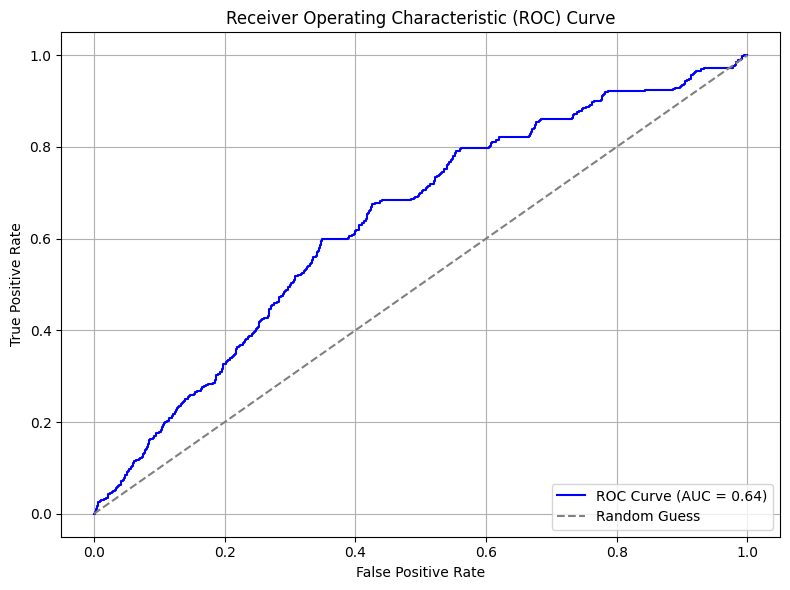

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you already have the model and the test data
# `y_test` is the true labels, and `y_pred_proba` is the predicted probabilities for the positive class

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Guess')

# Add labels and title
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [43]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 1.3 MB/s eta 0:00:00a 0:00:01


In [70]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import TimeSeriesSplit
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import optuna

# Ensure data is sorted by time
df_merge_tfo = df_merge_tfo.sort_values('time').reset_index(drop=True)

# Define input features and target
X = df_merge_tfo[['atr96', 'trend', 'weighted_upside_0', 'weighted_upside_1',
                  'weighted_upside_2', 'weighted_downside_0', 'weighted_downside_1',
                  'weighted_downside_2', 'TFO', 'TFO_diff']]
y = df_merge_tfo['B_2_1']

# Convert target variable to integers if necessary
if str in y.apply(type).unique():
    y = y.map({'False': 0, 'True': 1})
elif bool in y.apply(type).unique():
    y = y.astype(int)

# Ensure feature and target alignment
X = X.loc[df_merge_tfo.index]
y = y.loc[df_merge_tfo.index]

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)

# Total number of rows
total_rows = len(y)

# Initialize a list to store trial results
trial_results = []

# Optuna optimization function
def objective(trial):
    fold = 1
    precisions = []
    total_true_positives = 0
    for train_index, test_index in tscv.split(X):
        # Prepare train and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Apply SMOTE for balanced training data
        smote_num = trial.suggest_categorical("smote_num", [0.35, 0.4, 0.45])
        smote = SMOTE(random_state=42, sampling_strategy=smote_num)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

        # Suggest hyperparameters with Optuna
        n_estimators = trial.suggest_int("n_estimators", 80, 120)
        max_depth = trial.suggest_int("max_depth", 10, 30)
        min_samples_split = trial.suggest_int("min_samples_split", 5, 20)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

        # Map class_weight options to integers
        class_weight_option = trial.suggest_categorical("class_weight", [1, 1.5])
        class_weight = {0: 1, 1: class_weight_option}

        # Initialize Random Forest with optimized hyperparameters
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            class_weight=class_weight,
            random_state=42,
            n_jobs=-1,
        )

        # Train the model
        model.fit(X_train_balanced, y_train_balanced)

        # Get predicted probabilities
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

        # Use a higher threshold for positive predictions to improve precision
        threshold = 0.7
        y_pred = (y_pred_proba >= threshold).astype(int)

        # Calculate precision specifically for the positive class
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        precision_class_1 = report["1"]["precision"]
        precisions.append(precision_class_1)

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        true_positives = cm[1, 1]
        total_true_positives += true_positives

        fold += 1

    # Compute average precision across folds
    avg_precision = np.mean(precisions)

    # Collect the trial's results
    trial_result = {
        'trial_number': trial.number,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'class_weight': class_weight_option,
        'smote_num': smote_num,
        'avg_precision': avg_precision,
        'total_true_positives': total_true_positives
    }
    trial_results.append(trial_result)

    # Return the average precision of the positive class for optimization
    return avg_precision

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# After optimization, create a DataFrame from trial_results
results_df = pd.DataFrame(trial_results)

# Sort the DataFrame by avg_precision in descending order
results_df = results_df.sort_values(by='avg_precision', ascending=False)

# Show the top 10 results
print("Top 10 Results:")
print(results_df.head(10))

[I 2024-12-01 17:06:40,222] A new study created in memory with name: no-name-04c2ff91-8e1a-4e4c-b9ba-6bd4bfc1051c
[I 2024-12-01 17:06:42,022] Trial 0 finished with value: 0.05940912010276172 and parameters: {'smote_num': 0.35, 'n_estimators': 112, 'max_depth': 19, 'min_samples_split': 17, 'min_samples_leaf': 2, 'class_weight': 1}. Best is trial 0 with value: 0.05940912010276172.
[I 2024-12-01 17:06:43,884] Trial 1 finished with value: 0.1591986723565671 and parameters: {'smote_num': 0.45, 'n_estimators': 109, 'max_depth': 26, 'min_samples_split': 20, 'min_samples_leaf': 9, 'class_weight': 1.5}. Best is trial 1 with value: 0.1591986723565671.
[I 2024-12-01 17:06:45,877] Trial 2 finished with value: 0.08689024390243903 and parameters: {'smote_num': 0.45, 'n_estimators': 102, 'max_depth': 23, 'min_samples_split': 7, 'min_samples_leaf': 1, 'class_weight': 1.5}. Best is trial 1 with value: 0.1591986723565671.
[I 2024-12-01 17:06:47,885] Trial 3 finished with value: 0.11445399554282075 and p

Top 10 Results:
    trial_number  n_estimators  max_depth  min_samples_split  \
37            37            83         18                 12   
38            38            85         18                 12   
36            36            84         20                 13   
22            22           100         21                 18   
27            27            88         20                 16   
60            60           106         18                 19   
66            66           107         16                 17   
81            81           115         16                 19   
71            71           111         16                 19   
64            64           113         16                 19   

    min_samples_leaf  class_weight  smote_num  avg_precision  \
37                 1           1.5       0.40       0.391738   
38                 1           1.5       0.40       0.391340   
36                 1           1.0       0.40       0.391329   
22                 8   

In [77]:
results_df2 = results_df.copy()
results_df2 = results_df2.reset_index(drop=True)
results_df2.iloc[0]

trial_number            37.000000
n_estimators            83.000000
max_depth               18.000000
min_samples_split       12.000000
min_samples_leaf         1.000000
class_weight             1.500000
smote_num                0.400000
avg_precision            0.391738
total_true_positives    18.000000
Name: 0, dtype: float64

In [78]:
# Assuming results_df is already available from the first cell

# Select the best parameters
best_params = results_df2.iloc[0]

# Extract parameters
n_estimators = int(best_params['n_estimators'])
max_depth = int(best_params['max_depth'])
min_samples_split = int(best_params['min_samples_split'])
min_samples_leaf = int(best_params['min_samples_leaf'])
class_weight_option = best_params['class_weight']
class_weight = {0: 1, 1: class_weight_option}
smote_num = best_params['smote_num']
threshold = 0.7  # Use the same threshold as in the optimization

# Prepare the data (ensure proper indexing)
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Split the data into training and testing sets (last 20% for testing)
split_index = int(0.8 * len(X))
X_train_orig = X.iloc[:split_index]
X_test_orig = X.iloc[split_index:]
y_train_orig = y.iloc[:split_index]
y_test_orig = y.iloc[split_index:]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_orig)
X_test_scaled = scaler.transform(X_test_orig)

# Apply SMOTE to training data
smote = SMOTE(random_state=42, sampling_strategy=smote_num)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train_orig)

# Initialize Random Forest with optimized hyperparameters
model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    class_weight=class_weight,
    random_state=42,
    n_jobs=-1,
)

# Train the model on the training data
model.fit(X_train_balanced, y_train_balanced)

# Get predicted probabilities on the test set
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Use the specified threshold to get predictions
y_pred = (y_pred_proba >= threshold).astype(int)

# Print confusion matrix
cm = confusion_matrix(y_test_orig, y_pred)
print("Confusion Matrix:")
print(cm)

# Save the model to ONNX
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

initial_type = [("float_input", FloatTensorType([None, X.shape[1]]))]
onnx_model = convert_sklearn(model, initial_types=initial_type)

# Save to file
onnx_file_path = "best_model.onnx"
with open(onnx_file_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"Model saved to {onnx_file_path}")


Confusion Matrix:
[[2687   10]
 [ 670    0]]
Model saved to best_model.onnx


In [37]:
# From Claude

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    roc_curve,
    precision_recall_curve,
    classification_report,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Import ONNX conversion library
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Track the best model and its precision
best_model = None
best_precision = 0
best_fold = None

fold = 1
for train_index, test_index in tscv.split(X):
    print(f"\nFold {fold}:")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply SMOTE for balanced training data
    smote = SMOTE(random_state=42, sampling_strategy=0.4)  # Creates positive samples to be 40% of negative
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
    
    # Initialize Random Forest with optimized hyperparameters
    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=12,
        min_samples_split=10,
        min_samples_leaf=4,
        class_weight={0: 1, 1: 2},  # Additional weight on positive class
        random_state=42,
        n_jobs=-1
    )
    
    # Train the model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Get predicted probabilities
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Use a higher threshold for positive predictions to improve precision
    threshold = 0.6  # Adjusted threshold (default is 0.5)
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Calculate metrics
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)
    
    # Calculate precision specifically for the positive class
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    precision_class_1 = report['1']['precision']
    
    # Store the model if it has the best positive class precision
    if precision_class_1 > best_precision:
        best_precision = precision_class_1
        best_model = model
        best_fold = fold
    
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"PR-AUC Score: {pr_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    
    fold += 1

# Save the best model to ONNX
if best_model is not None:
    print(f"\nBest model found on Fold {best_fold} with Positive Class Precision: {best_precision:.4f}")
    
    # Convert to ONNX
    initial_type = [('float_input', FloatTensorType([None, X.shape[1]]))]
    onnx_model = convert_sklearn(best_model, initial_types=initial_type)
    
    # Save to file
    onnx_file_path = f"best_model_fold_{best_fold}.onnx"
    with open(onnx_file_path, "wb") as f:
        f.write(onnx_model.SerializeToString())
    
    print(f"Best model saved to {onnx_file_path}")
else:
    print("No model was selected for saving.")


Fold 1:


ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Confusion Matrix:
[[4324   63]
 [ 314  349]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4387
           1       0.85      0.53      0.65       663

    accuracy                           0.93      5050
   macro avg       0.89      0.76      0.80      5050
weighted avg       0.92      0.93      0.92      5050



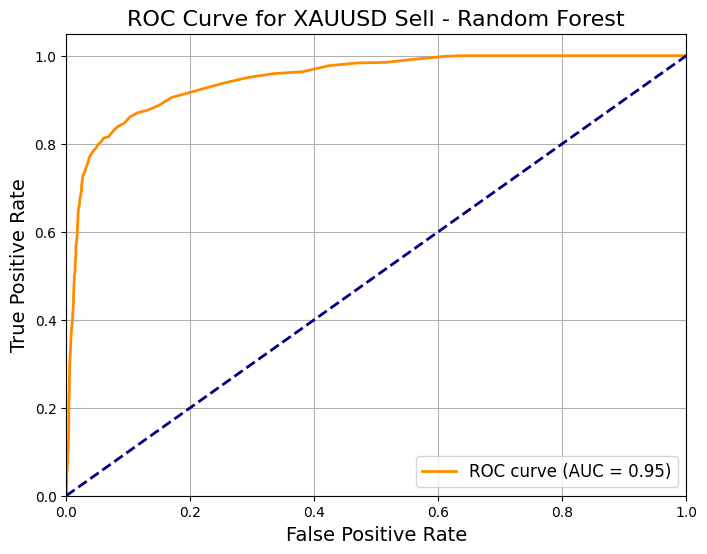

In [ ]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Changed
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc  # Added roc_curve and auc
import matplotlib.pyplot as plt  # For plotting

# Define input features and target
X = df_merge_tfo[['atr96', 'trend', 'weighted_upside_0', 'weighted_upside_1', 'weighted_upside_2',
                  'weighted_downside_0', 'weighted_downside_1', 'weighted_downside_2', 'TFO', 'TFO_diff']]
y = df_merge_tfo['S_2_1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Convert the target variable to categorical/binary
threshold = 0.5
y_train = (y_train > threshold).astype(int)
y_test = (y_test > threshold).astype(int)

# Initialize and train the Random Forest model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for XAUUSD Sell - Random Forest', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

# Define the input type for conversion
initial_type = [('float_input', FloatTensorType([None, X.shape[1]]))]

# Convert the model to ONNX format
onnx_model = convert_sklearn(model, initial_types=initial_type)

# Save the ONNX model to a file
with open("XAUUSD_Sell.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data preparation
X = df_merge_tfo[['atr96', 'trend', 'upside_0', 'upside_1', 'upside_2', 
                  'downside_0', 'downside_1', 'downside_2', 'weight_0', 'weight_1', 'weight_2',
                  'TFO', 'TFO_diff']]
y = df_merge_tfo['B_2_1'].astype(int)

# Convert to numpy arrays to avoid indexing issues
X = X.values
y = y.values

# Check class distribution
print("Class distribution:")
print(pd.Series(y).value_counts(normalize=True))

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Calculate class weights
class_weights = dict(zip(
    np.unique(y_train),
    len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train))
))

# Model architecture
def create_model(input_dim, learning_rate=0.001):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim, 
              kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC()]
    )
    
    return model

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Train with cross-validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
cv_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    print(f'\nFold {fold + 1}/{n_splits}')
    
    # Now using numpy array indexing instead of pandas indexing
    X_train_fold = X_train[train_idx]
    y_train_fold = y_train[train_idx]
    X_val_fold = X_train[val_idx]
    y_val_fold = y_train[val_idx]
    
    model = create_model(X.shape[1])
    
    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=100,
        batch_size=32,
        class_weight=class_weights,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(scores[1])

print(f'\nCross-validation accuracy: {np.mean(cv_scores):.3f} (+/- {np.std(cv_scores):.3f})')

# Train final model
final_model = create_model(X.shape[1])
history = final_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate final model
y_pred_prob = final_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nTest Set Metrics:")
print(classification_report(y_test, y_pred))



# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

NameError: name 'df_merge_tfo' is not defined